# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import math
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '../output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
#begin the API Calls to print eaccity in the loop

url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'metric'
city = 'x'
args = f'&appid={weather_api_key}&units={units}'
cities_2 = []
cloudieness = [] 
dates = []
countrys = []
humiditys = []
lats = []
longs = []
MaxTemps = []
WindSpeeds = []
index = 1
print(f'Beginning Data Retrieval \n-----------------------------')


for city in cities:
    try:
        #step1: get the reesponce from the API 
        Response = requests.get(url+city+args).json()
        #print(url+city+args)
        #print(Response)
        cities_2.append(Response['name'])
        cloudieness.append(Response['clouds']['all'])
        countrys.append(Response['sys']['country'])
        dates.append(Response['dt'])
        humiditys.append(Response['main']['humidity'])
        lats.append(Response['coord']['lat'])
        longs.append(Response['coord']['lon'])
        MaxTemps.append(Response['main']['temp_max'])
        WindSpeeds.append(Response['wind']['speed'])
        print(f'Processing Record {index} of Set {setNum} | '+city)
        index = index + 1
        if index > 50:
            index = 1
            setNum = setNum + 1
   
    except(KeyError, IndexError):
        print('City not found. Skipping...')
        
print(f'-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval 
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | sai buri
City not found. Skipping...
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | bartica
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | tabou
Processing Record 8 of Set 1 | laguna
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | mizdah
City not found. Skipping...
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | kamenka
Processing Record 14 of Set 1 | non sang
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | fort nelson
Processing Record 17 of Set 1 | cartagena
Processing Record 18 of Set 1 | storforshei
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | faanui
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
data = pd.DataFrame({'Cities' : cities_2,
                     'cloudieness' : cloudieness,
                     'country':countrys, 
                     'date' :dates,
                     'humidity': humiditys,
                     'lat': lats,  
                     'long': longs, 
                     'MaxTemps':   MaxTemps, 
                     'WindSpeed': WindSpeeds})
data


,Cities,cloudieness,country,date,humidity,lat,long,MaxTemps,WindSpeed
0,Mahébourg,40,MU,1624178376,60,-20.4081,57.7000,24.58,6.69
1,Atuona,56,PF,1624178206,79,-9.8000,-139.0333,25.90,9.36
2,Sai Buri,100,TH,1624178206,69,6.7013,101.6168,31.84,2.55
3,Chapais,100,CA,1624178377,85,49.7834,-74.8492,11.88,2.56
4,Bartica,33,GY,1624178377,99,6.4000,-58.6167,24.18,0.64
...,...,...,...,...,...,...,...,...,...
556,Puerto Quijarro,39,BO,1624178496,83,-17.7833,-57.7667,11.75,1.34
557,San Cristobal,100,VE,1624178496,97,7.7669,-72.2250,17.92,1.59
558,Bubaque,90,GW,1624178496,75,11.2833,-15.8333,25.85,4.68
559,Micomeseng,62,GQ,1624178496,77,2.1462,10.6164,25.69,0.91


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

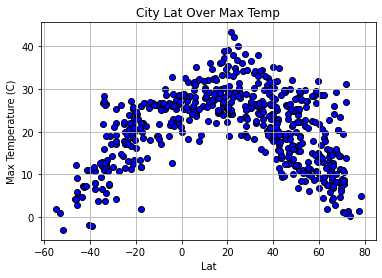

In [41]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(data['lat'], data['MaxTemps'], facecolor = 'blue', edgecolor = 'black')
plt.title('City Lat Over Max Temp')
plt.xlabel('Lat')
plt.ylabel('Max Temperature (C)')
plt.grid(linestyle='-')
plt.savefig('../Images/City Latitude vs Max Temperature.png')

## Latitude vs. Humidity Plot

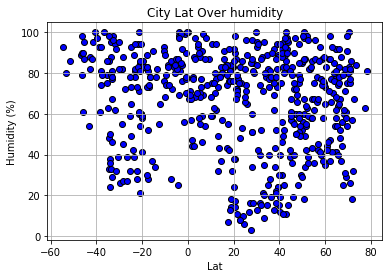

In [45]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(data['lat'], data['humidity'], facecolor = 'blue', edgecolor = 'black')
plt.title('City Lat Over humidity')
plt.xlabel('Lat')
plt.ylabel('Humidity (%)')
plt.grid(linestyle='-')
plt.savefig('../Images/City Latitude vs humidity.png')

## Latitude vs. Cloudiness Plot

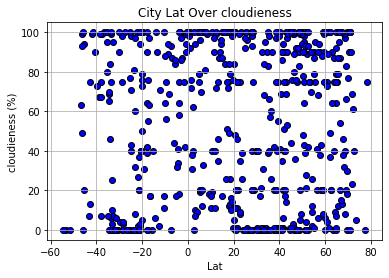

In [46]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(data['lat'], data['cloudieness'], facecolor = 'blue', edgecolor = 'black')
plt.title('City Lat Over cloudieness')
plt.xlabel('Lat')
plt.ylabel('cloudieness (%)')
plt.grid(linestyle='-')
plt.savefig('../Images/City Latitude vs cloudieness.png')

## Latitude vs. Wind Speed Plot

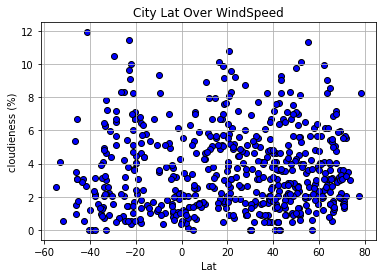

In [47]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(data['lat'], data['WindSpeed'], facecolor = 'blue', edgecolor = 'black')
plt.title('City Lat Over WindSpeed')
plt.xlabel('Lat')
plt.ylabel('cloudieness (%)')
plt.grid(linestyle='-')
plt.savefig('../Images/City Latitude vs WindSpeed.png')

In [ ]:
#Obersvations 

#1 Lat did not have a significant effect on windspeed 
#2 Lat did not have a significant effect on cloudiness
#3 lat had a significant effect on maxtemp